### Weather Australia

In [8]:
import numpy as np 
import pandas as pd
from datetime import datetime
from pandas import DataFrame

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv("Dataset/cleaned_weatherAUS.csv", parse_dates=["Date"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71382 entries, 0 to 71381
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           71382 non-null  datetime64[ns]
 1   Location       71382 non-null  object        
 2   MinTemp        70765 non-null  float64       
 3   MaxTemp        70793 non-null  float64       
 4   Rainfall       70471 non-null  float64       
 5   Evaporation    71382 non-null  float64       
 6   Sunshine       71382 non-null  float64       
 7   WindGustDir    67031 non-null  object        
 8   WindGustSpeed  67054 non-null  float64       
 9   WindDir9am     68765 non-null  object        
 10  WindDir3pm     70664 non-null  object        
 11  WindSpeed9am   71167 non-null  float64       
 12  WindSpeed3pm   70950 non-null  float64       
 13  Humidity9am    70469 non-null  float64       
 14  Humidity3pm    70293 non-null  float64       
 15  Pressure9am    7072

In [10]:
print(dataset)

            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow
0     2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3         SSW           48.0        ENE         SW           6.0          20.0         20.0         13.0       1006.3       1004.4       2.0       5.0     26.6     33.4        No           No
1     2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0           S           37.0        SSE        SSE          19.0          19.0         30.0          8.0       1012.9       1012.1       1.0       1.0     20.3     27.0        No           No
2     2009-01-03    Cobar     15.5     34.1       0.0         12.6      13.3          SE           30.0        NaN          N           NaN           7.0          NaN          7.0          NaN       

In [11]:
dataset.notnull()
dataset.ffill(inplace=True)

In [12]:
dataset.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
x = ["Yes", "No"]
y = [
(dataset["RainTomorrow"] == "No").sum(),
(dataset["RainTomorrow"] == "Yes").sum(),
]
bar_colors = ['tab:red', 'tab:blue']

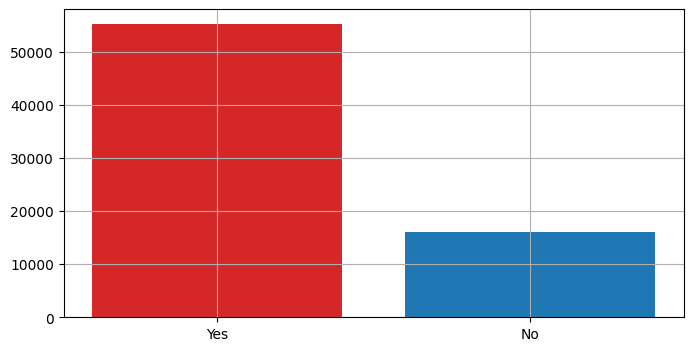

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(x, y, color=bar_colors)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.grid(True)
# ax.legend(title='')

plt.show()

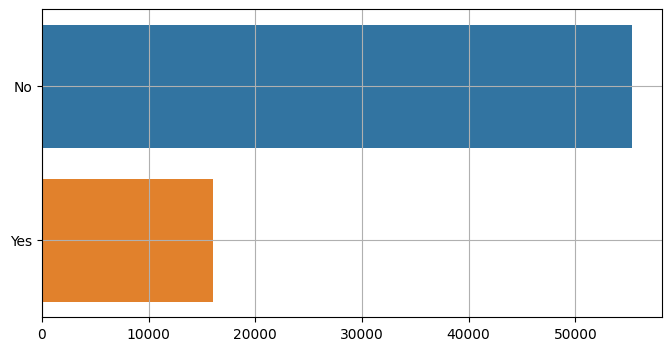

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(dataset, y="RainTomorrow", hue="RainTomorrow")

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.grid(True)
# ax.legend(title='')

plt.show()

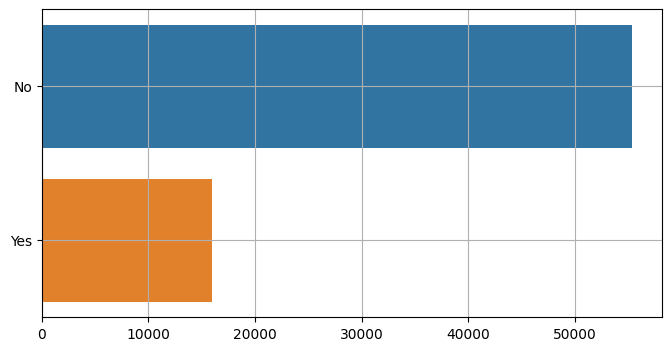

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(dataset, y="RainToday", hue="RainToday")

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.grid(True)
# ax.legend(title='')

plt.show()

<Axes: >

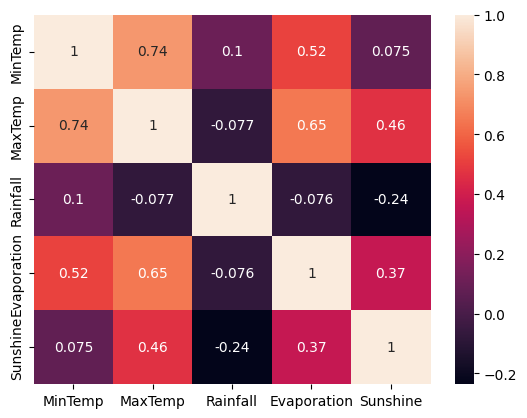

In [17]:
df_heatmap = dataset[["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine"]].corr()
sns.heatmap(data=df_heatmap, annot=True)

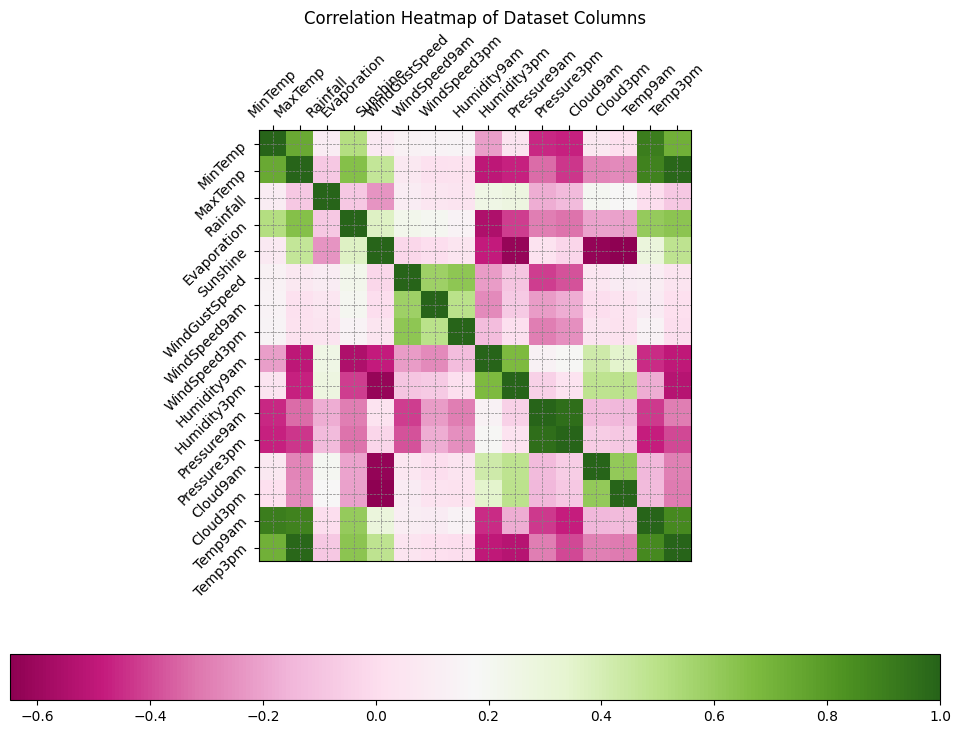

In [18]:
# Create the heatmap using Seaborn (which builds on Matplotlib)
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize= (12, 8))

df_heatmap = dataset[["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", 
                      "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]].corr()
df = pd.DataFrame(df_heatmap)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_yticks(np.arange(len(df.index)))
ax.set_yticklabels(df.index)
ax.tick_params(top=True, bottom=False,labeltop=True, rotation=45, labelbottom=False)
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

img = plt.imshow(df_heatmap, cmap='PiYG')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.colorbar(img, orientation='horizontal')
plt.title('Correlation Heatmap of Dataset Columns')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [19]:
dataset[["WindGustDir", "RainTomorrow"]]

,WindGustDir,RainTomorrow
0,SSW,No
1,S,No
2,SE,No
3,NNE,No
4,WNW,No
...,...,...
71377,ENE,No
71378,E,No
71379,E,No
71380,ESE,No


In [20]:
wgd = dataset.groupby("WindGustDir")["RainTomorrow"].count()
wgd = wgd.sort_values(ascending=False)

df_wgd = pd.DataFrame(wgd).reset_index()
df_wgd

,WindGustDir,RainTomorrow
0,N,7778
1,SE,5652
2,SW,5038
3,W,5030
4,E,4986
5,SSW,4724
6,WSW,4629
7,ENE,4435
8,S,4383
9,SSE,4013


<Axes: xlabel='WindGustDir', ylabel='RainTomorrow'>

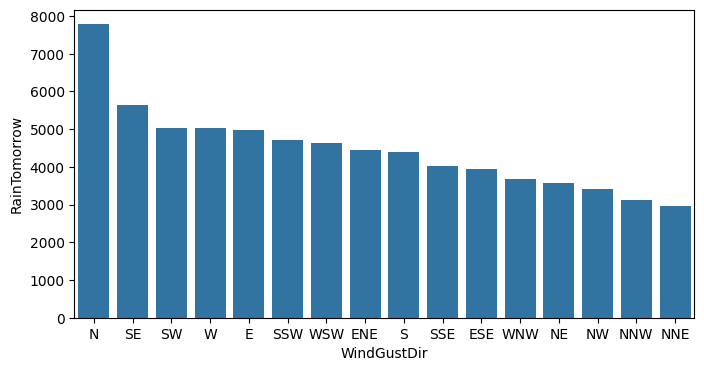

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(df_wgd, x="WindGustDir", y="RainTomorrow")

<Axes: xlabel='WindGustDir', ylabel='count'>

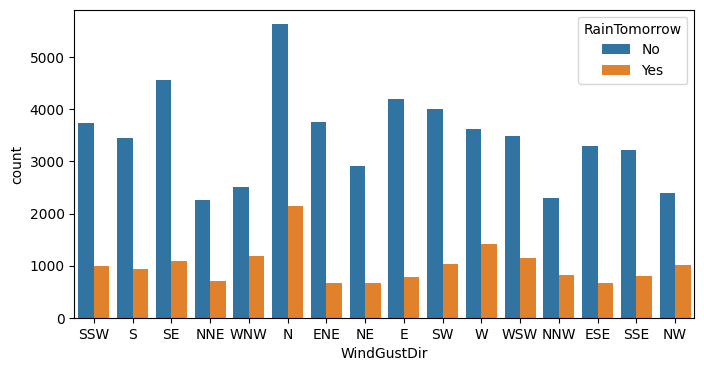

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(dataset, x="WindGustDir", hue="RainTomorrow")

In [23]:
# fig, ax = plt.subplots(figsize= (15, 5))

# ax.plot(dataset['Date'], dataset['Humidity3pm'])
# ax.set_xlabel('Date')
# ax.set_ylabel('Humidity3pm', color='blue')
# ax.tick_params(axis='y', labelcolor='blue')

# plt.title('')
# plt.xlabel('')
# plt.ylabel('')

# plt.grid(True)
# plt.show()

In [24]:
# fig, ax = plt.subplots(figsize= (15, 5))

# sns.lineplot(data=dataset, x="Date", y="Humidity3pm")